In [1]:
# try to import library, if it is not installed it will be downloaded (required to run code on Google Colab)
import os
try:
  import autoscattering
except:
  if not os.path.isdir('autoscatter'):
    !git clone https://github.com/jlandgr/autoscatter.git
    !mv autoscatter/autoscattering .

In [3]:
import sympy as sp
import jax
jax.config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import autoscattering.architecture_optimizer as arch_opt
import autoscattering.constraints as msc
import autoscattering.symbolic as sym

In [2]:
S_target = sp.Matrix([[0,0],[1,0]])
print('target scattering matrix of an isolator:')
sym.render(S_target)
optimizer = arch_opt.Architecture_Optimizer(
    S_target=sp.Matrix([[0,0],[1,0]]),
    num_auxiliary_modes=1,
)
irreducible_graphs = optimizer.perform_depth_first_search()

target scattering matrix of an isolator:


<IPython.core.display.Math object>

fully connected graph is a valid graph
prepare list of all possible graphs


216it [00:00, 227630.57it/s]


216 graphs identified
start depth-first search
test all graphs with 9 degrees of freedom:


100%|██████████| 1/1 [00:00<00:00,  7.07it/s]


test all graphs with 8 degrees of freedom:


100%|██████████| 6/6 [00:00<00:00, 46.21it/s]


test all graphs with 7 degrees of freedom:


100%|██████████| 15/15 [00:00<00:00, 27.87it/s]


test all graphs with 6 degrees of freedom:


100%|██████████| 10/10 [00:00<00:00, 46.53it/s]


test all graphs with 5 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 4 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 3 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 2 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 1 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 0 degrees of freedom:


0it [00:00, ?it/s]

optimisation finished, list of irreducible graphs has 3 elements


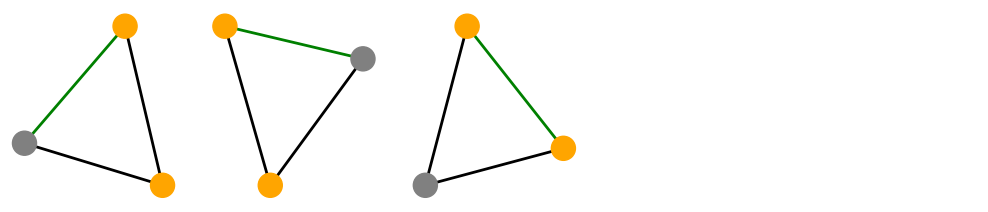

In [3]:
node_colors = ['orange', 'orange', 'gray'] # the port modes are orange, the auxiliary mode gray
msc.plot_list_of_graphs(irreducible_graphs, node_colors=node_colors)